# Projet d'analyse de fraude

Par Théo DESLAGE et Maximilien GOMAS

## Exploration et visualisation des données

On peut constater que les données sont divisées en deux ensembles :
- Le premier, labelisé, servira à l'apprentissage supervisé (Entrainement et test)
- Le second, inconnu, représente une situation réelle dans laquelle nous devrons prédire à l'aide de notre modèle

Chargeons les données

In [20]:
import pandas as pd

# load the training dataset
data = pd.read_csv('data/Data_Projet_1.csv')
data['gender'] = data['gender'].astype('category')
data['incident_cause'] = data['incident_cause'].astype('category')
data['claim_area'] = data['claim_area'].astype('category')
data['fraudulent'] = data['fraudulent'].astype('category')
data['claim_area'] = data['claim_area'].astype('category')
data['total_policy_claims'] = data['total_policy_claims'].astype('category')
data['police_report'] = data['police_report'].astype('category')
data['claim_type'] = data['claim_type'].astype('category')
sample = data.sample(10)
sample

,claim_id,customer_id,age,gender,incident_cause,days_to_incident,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
431,49818123,23116437,58,Female,Other driver error,1375,Auto,No,Material only,1280.0,1,No
426,22577147,66433138,21,Male,Driver error,130,Auto,No,Material and injury,21447.5,2,Yes
857,61586929,9339845,42,Male,Driver error,6081,Auto,No,Material only,2850.0,1,No
654,93183406,89279737,76,Female,Driver error,5182,Auto,No,Material and injury,21920.0,1,No
697,32178193,86491727,27,Female,Driver error,8,Home,Unknown,Material only,1860.0,1,No
913,13820212,15323667,72,Female,Driver error,4379,Auto,Unknown,Injury only,15270.0,4,No
757,46163490,8375366,42,Female,Crime,814,Auto,Unknown,Material only,2110.0,1,No
310,79752814,76093960,61,Female,Other causes,6778,Auto,Unknown,Material only,2700.0,2,No
861,78381090,66353946,30,Female,Other driver error,6,Auto,Unknown,Material and injury,26890.0,1,No
806,38981782,21330507,64,Male,Other causes,459,Home,No,Material only,2390.0,1,No


Sample data is a better way to see random data (sometimes head is not representative)

In [21]:
print(data.dtypes)

claim_id                  int64
customer_id               int64
age                       int64
gender                 category
incident_cause         category
days_to_incident          int64
claim_area             category
police_report          category
claim_type             category
claim_amount            float64
total_policy_claims    category
fraudulent             category
dtype: object


## Pré traitement des données

On commence par scale les données (entre 0 et 1), les modèles de deep learning fonctionnent mieux ainsi
- age
- days to incident
- claim_amount
- total policy claim

In [22]:
data.describe()

,claim_id,customer_id,age,days_to_incident,claim_amount
count,1.100000e+03,1.100000e+03,1100.000000,1100.000000,1100.000000
mean,4.883819e+07,5.087470e+07,47.797273,2814.124545,12317.582273
std,2.918806e+07,2.846102e+07,17.628400,2784.765937,13687.814171
min,2.683200e+04,1.545570e+05,18.000000,2.000000,1000.000000
25%,2.381580e+07,2.679176e+07,33.000000,635.500000,1880.000000
50%,4.853933e+07,4.985515e+07,47.000000,2042.500000,2750.000000
75%,7.407447e+07,7.594951e+07,63.000000,4153.500000,23965.000000
max,9.977548e+07,9.996199e+07,79.000000,14991.000000,48150.500000


La description des données nous donne des informations intéressantes sur les valeurs numériques.
Pour âge on voir que la moyenne est 47 ans. La médianne aussi et il est compris entre 18 et 79 ans. Il semble donc assez bien réparti.


# Analyser chaque column par le prisme de la fraude

Le but ici va être de regarder chaque colonne et de l'analyser afin de comprendre à quel point elle impact sur le fait que la transaction soit frauduleuse ou non.

On analyse en premier les colonne de type "catégorie" avant de passer en dessous aux boxplot

fraudulent
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: gender, dtype: object

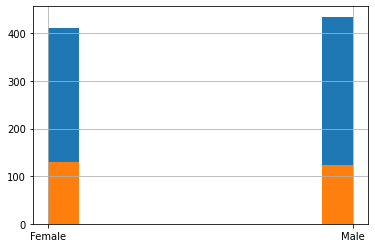

In [23]:
#Starting with gender
data.groupby('fraudulent').gender.hist(stacked=True)

fraudulent
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: incident_cause, dtype: object

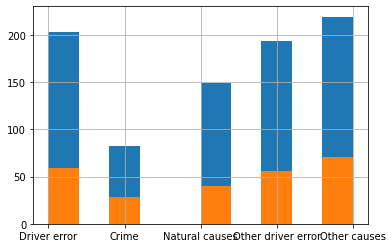

In [24]:
data.groupby('fraudulent').incident_cause.hist(stacked=True)

fraudulent
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: claim_area, dtype: object

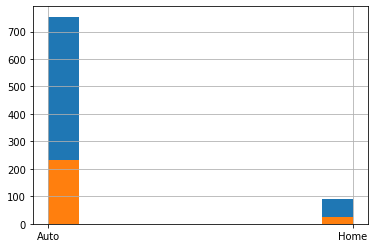

In [25]:
data.groupby('fraudulent').claim_area.hist(stacked=True)

fraudulent
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: police_report, dtype: object

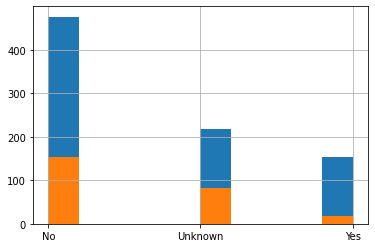

In [26]:
data.groupby('fraudulent').police_report.hist(stacked=True)

fraudulent
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: claim_type, dtype: object

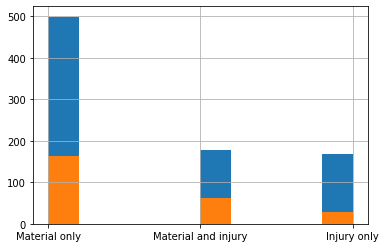

In [27]:
data.groupby('fraudulent').claim_type.hist(stacked=True)

fraudulent
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: total_policy_claims, dtype: object

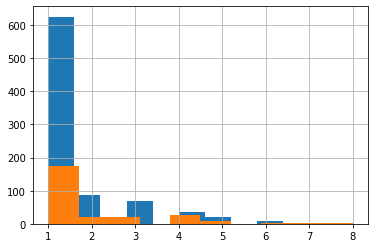

In [28]:
data.groupby('fraudulent').total_policy_claims.hist(stacked=True)

fraudulent
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: claim_amount, dtype: object

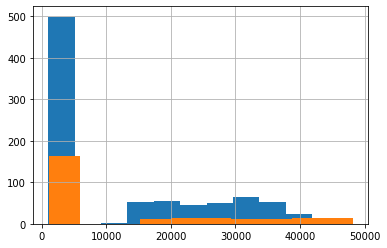

In [29]:
data.groupby('fraudulent').claim_amount.hist(stacked=True)

fraudulent
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: police_report, dtype: object

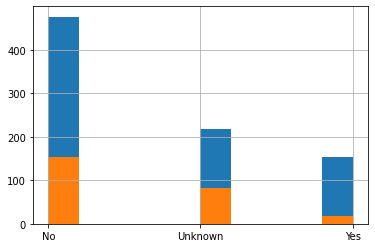

In [30]:
data.groupby('fraudulent').police_report.hist(stacked=True)

On conclue que cette donnée sera pertinente dans le modèle, on voit que lorsqu'il y a eu un rapport de police les chances sont grandement diminuées

<AxesSubplot:xlabel='fraudulent', ylabel='age'>

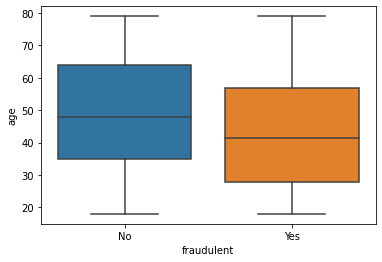

In [31]:
import matplotlib as plt
import seaborn as sns

sns.boxplot(x='fraudulent', y='age', data=data)

L'âge semble très intéressant on regarde avec l'histogramme pour confirmer que les jeunes semblent bien plus susceptibles de faire des déclarations frauduleuses

fraudulent
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: age, dtype: object

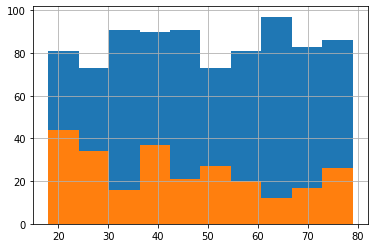

In [32]:
data.groupby('fraudulent').age.hist(stacked=True)

Dans le cas d'un arbre de décision, cette feature pourra probablement aller en haut car elle est très déterminante.

# Data scaling

In [33]:
from sklearn.preprocessing import minmax_scale

data[['age','days_to_incident', 'claim_amount']] = minmax_scale(data[['age','days_to_incident', 'claim_amount']])

data.head()

,claim_id,customer_id,age,gender,incident_cause,days_to_incident,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,0.229508,Female,Driver error,0.014878,Auto,No,Material only,0.041993,1,No
1,33985796,75740424,0.688525,Female,Crime,0.792048,Home,Unknown,Material only,0.041993,3,No
2,53522022,30308357,0.147541,Female,Other driver error,0.000133,Auto,No,Material only,0.050254,1,Yes
3,13015401,47830476,0.344262,Female,Natural causes,0.351991,Auto,No,Material only,0.014422,1,No
4,22890252,19269962,0.475410,Male,Crime,0.155647,Auto,No,Material only,0.035631,1,No


In [37]:
features = ['age', 'gender', 'incident_cause', 'days_to_incident', 'claim_area', 'police_report', 'claim_type', 'claim_amount', 'total_policy_claims']

data[features].describe()

,age,days_to_incident,claim_amount
count,1100.000000,1100.000000,1100.000000
mean,0.488480,0.187613,0.240031
std,0.288990,0.185787,0.290301
min,0.000000,0.000000,0.000000
25%,0.245902,0.042264,0.018664
50%,0.475410,0.136133,0.037115
75%,0.737705,0.276970,0.487057
max,1.000000,1.000000,1.000000


On sait que deux variables ne sont pas pertinentes dans la prédiction, l'ID de la transaction *claim_id* puisqu'il est unique et le numéro d'utilisateur *customer_id*. On pourrait établir un modèle qui prend en compte le *customer_id* pour "suspecter" ceux qui ont déjà fraudé. Mais dans ce cas de la détection de nouvelles fraudes l'utilisateur sera très probablement nouveau, il ne faut pas que cela altère le jugement du modèle, qui doit se méfier de tout le monde, sans distinction.

## Définition de la méthode d'évaluation des classifieurs

## Définition des données d'apprentissage et de test

## Construction et évaluation du classifieur

## Choix du classifieur le plus performant

## Application du classifieur aux données à prédire